In [331]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [332]:
df_train = pd.read_csv('/content/loan_sanction_train.csv')
df_test = pd.read_csv('/content/loan_sanction_test (1).csv')

In [333]:
df = pd.merge(df_train, df_test, how='outer', on=None)

<ipython-input-333-f692d87a6409>:1: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  df = pd.merge(df_train, df_test, how='outer', on=None)


In [334]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [335]:
df.shape

(981, 13)

In [336]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


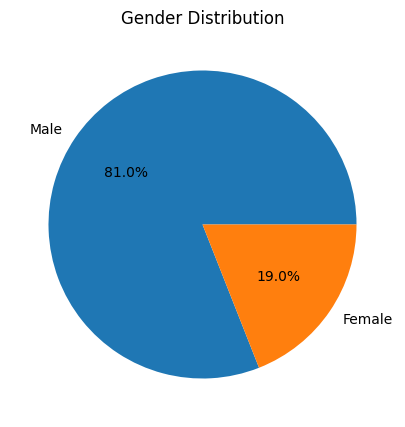

In [338]:
plt.figure(figsize=(10,5))
# Use the pie function from pyplot to make a pie chart.
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%1.1f%%')
plt.title('Gender Distribution') # Add a title for clarity
plt.show() # Display the chart

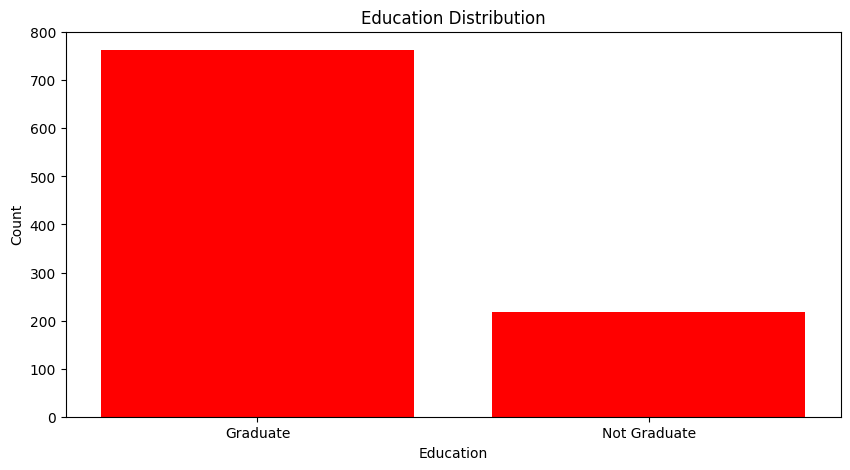

In [339]:
plt.figure(figsize=(10,5))
# Correctly assign values to the x and height arguments of plt.bar()
# Call the value_counts() function to get the Series and then access its index and values
plt.bar(df['Education'].value_counts().index, df['Education'].value_counts().values, color='red')
plt.xlabel("Education")
plt.ylabel("Count")
plt.title("Education Distribution")
plt.show()

In [340]:
df.isnull().sum()

,0
Loan_ID,0
Gender,24
Married,3
Dependents,25
Education,0
Self_Employed,55
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,27
Loan_Amount_Term,20


In [341]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [342]:
df = df.dropna(axis=0, how='any')

In [343]:
df['Married']= df['Married'].replace({"Yes":1,"No":0})

<ipython-input-343-b244f376596e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Married']= df['Married'].replace({"Yes":1,"No":0})
<ipython-input-343-b244f376596e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Married']= df['Married'].replace({"Yes":1,"No":0})


In [344]:
df['Education']= df['Education'].replace({"Graduate":1,"Not Graduate":0})

<ipython-input-344-dbc2b3892aa8>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Education']= df['Education'].replace({"Graduate":1,"Not Graduate":0})
<ipython-input-344-dbc2b3892aa8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education']= df['Education'].replace({"Graduate":1,"Not Graduate":0})


In [345]:
df['Self_Employed'] = df['Self_Employed'].replace({"Yes":1,"No":0})

<ipython-input-345-be00c596cd77>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Self_Employed'] = df['Self_Employed'].replace({"Yes":1,"No":0})
<ipython-input-345-be00c596cd77>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Self_Employed'] = df['Self_Employed'].replace({"Yes":1,"No":0})


In [346]:
df['Gender'] = df['Gender'].replace({"Male":1,"Female":0})

<ipython-input-346-9bea6307a849>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({"Male":1,"Female":0})
<ipython-input-346-9bea6307a849>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df['Gender'].replace({"Male":1,"Female":0})


In [347]:
df1 = pd.get_dummies(df, columns=['Property_Area'], prefix='Property_Area', drop_first=False)
df1.shape

(480, 15)

In [348]:
df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [349]:
df['Loan_Status']=df['Loan_Status'].replace({"Y":1,"N":0})

<ipython-input-349-59d3006fed09>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Loan_Status']=df['Loan_Status'].replace({"Y":1,"N":0})
<ipython-input-349-59d3006fed09>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Loan_Status']=df['Loan_Status'].replace({"Y":1,"N":0})


In [350]:
df['Dependents'].value_counts()

,count
Dependents,
0,274
2,85
1,80
3+,41


In [351]:
df2 = pd.get_dummies(df1, columns=['Dependents'], prefix='Dependents', drop_first=False)
df2.shape

(480, 18)

In [352]:
df2.drop(columns=['Loan_ID'],inplace=True)

In [353]:
df2.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+'],
      dtype='object')

Train Test Split

In [354]:
Y=df2['Loan_Status']
X=df2.drop(columns=['Loan_Status'])

In [375]:
Y=Y.replace({'Y':1,'N':0})

<ipython-input-375-3cebef195e61>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Y=Y.replace({'Y':1,'N':0})


In [376]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [377]:
X_train.shape

(384, 16)

In [378]:
X_test.shape

(96, 16)

In [379]:
for i in X_test.columns:
    X_test[i]=X_test[i].astype(np.int64)

In [380]:
for i in X_train.columns:
    X_train[i]=X_train[i].astype(np.int64)

In [381]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [382]:
model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [383]:
print("Accuracy:", accuracy*100)

Accuracy: 83.33333333333334


In [384]:
from sklearn.svm import SVC

In [385]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

In [386]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy*100)
conf_matrix = confusion_matrix(y_test, y_pred)

81.25


In [387]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)

# Training the model
dt_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Printing results
print("Accuracy:", accuracy*100)

Accuracy: 71.875
